In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.8.0


Using TensorFlow backend.


In [3]:
data = pd.read_csv("out.csv")
data.head()

,post,tags
0,picker in place of buttons what do people do ...,iphone
1,checkbox function for same ss billing sddress ...,angularjs
2,core data vs plist: making weapons and attachm...,iphone
3,ng-show on a dircetives controller value i am...,angularjs
4,i want to call a method after particular time ...,iphone


In [4]:
# Y = data['tags']
# X = data.drop("tags")

In [5]:
data['tags'].value_counts()

objective-c      2000
ruby-on-rails    2000
jquery           2000
angularjs        2000
javascript       2000
c                2000
java             2000
mysql            2000
sql              2000
iphone           2000
python           2000
.net             2000
asp.net          2000
c++              2000
c#               2000
html             2000
android          2000
ios              2000
php              2000
css              2000
Name: tags, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['post'], data['tags'], test_size = 0.2)

In [7]:
max_words = 16384
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [8]:
tokenize.fit_on_texts(x_train) # only fit on train
x_train = tokenize.texts_to_matrix(x_train)
x_test = tokenize.texts_to_matrix(x_test)


In [9]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [11]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)# Inspec 
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (32000, 16384)
x_test shape: (8000, 16384)
y_train shape: (32000, 20)
y_test shape: (8000, 20)


In [12]:
# Build the model
model = Sequential()
model.add(Dense(1024, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 512
epochs = 1

# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 28800 samples, validate on 3200 samples
Epoch 1/1
28800/28800 [==============================] - 6s 223us/step - loss: 0.0843 - acc: 0.9762 - val_loss: 1.0236 - val_acc: 0.8091


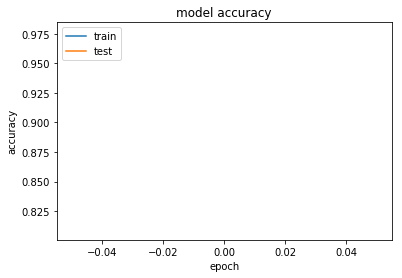

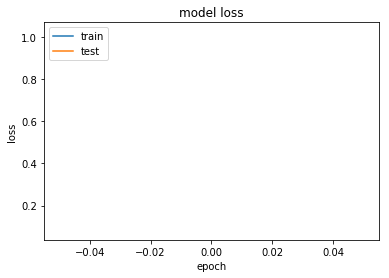

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:

# Evaluate the accuracy of our trained model# Evalua 
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

8000/8000 [==============================] - 1s 152us/step
Test score: 0.9487815165519714
Test accuracy: 0.8158749995231629


In [17]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    #     print(x_test[i], "...")
    print('Actual label:' + y_test[i])
    print("Predicted label: " + predicted_label + "\n")

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

In [18]:
y_softmaxy_softma  = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

NameError: name 'y_softmax' is not defined

In [19]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [20]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [8000, 0]

In [26]:
import h5py
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

ImportError: cannot import name _errors